In [62]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns

In [63]:
n = 25
sample = np.random.exponential(size = n)
print(sample)

[0.67508454 1.46526186 1.04028273 1.34708412 2.05092797 3.079057
 0.5588328  4.38013204 0.64014101 0.23488149 0.05650616 0.51461347
 0.34082105 0.09332863 1.4190569  0.42283071 0.36992634 1.47315504
 0.51975674 0.20109017 0.70645902 0.21221152 0.41199192 1.01022077
 2.53782018]


In [64]:
mode = st.mode(sample)
med = st.median(sample)
spread = sample.max() - sample.min()
mean = st.mean(sample)  
asym = st.mean((sample - mean) ** 3)/(st.mean((sample - mean) ** 2) ** 1.5)

print('Mode = ', mode, '\nMedian = ', med, '\nSpread = ', spread, '\nAsymmetry = ', asym)

Mode =  0.6750845376489114 
Median =  0.6401410105384351 
Spread =  4.323625874471288 
Asymmetry =  1.735609771824263


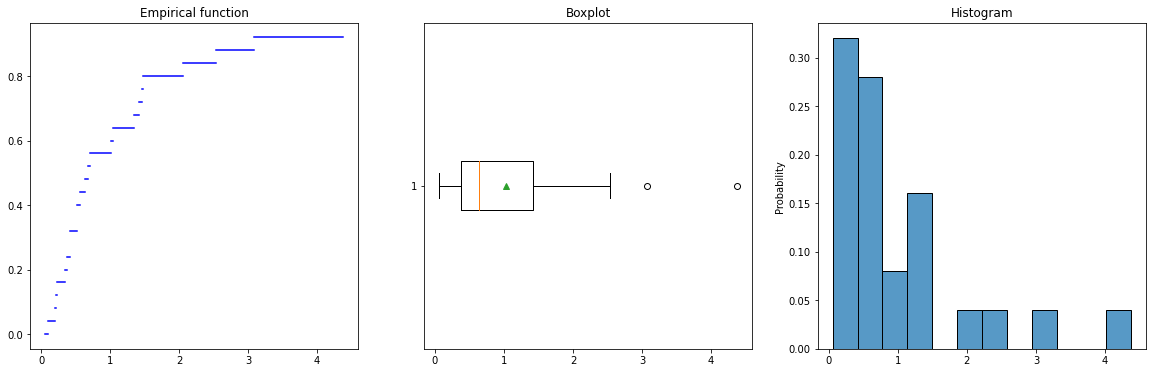

In [65]:
# Empirical function, boxplot and histogram
fg, ax = plt.subplots(1, 3, figsize = (20, 6))

x = sample.copy()
x.sort()
y = np.arange(0, 1, 1 / n)
for i in range (0, n - 1):
    ax[0].plot([x[i], x[i + 1]], [y[i], y[i]], color = 'blue')

ax[1].boxplot(x, vert = False, showmeans = True, showbox = True);
sns.histplot(x, bins = n // 2, stat = 'probability', common_norm = 1)

ax[0].set_title('Empirical function')
ax[1].set_title('Boxplot')
ax[2].set_title('Histogram');

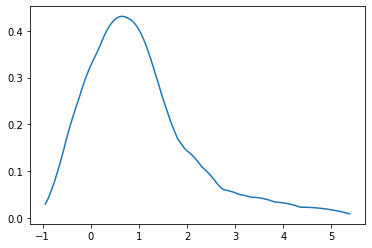

In [66]:
# Kernel estimation of distribution density
from cProfile import label


def epanechnikov(x):
    if np.abs(x) >= 1: return 0
    else: return 0.75 * (1. - x ** 2)
h = 2.344 * np.sqrt(np.sum((sample - mean) ** 2) / (n - 1)) / (n ** 0.2)

kde = np.zeros(100)
X = np.linspace(np.min(x) - 1, np.max(x) + 1, 100)
for i in range(0, 100):
    for j in range(0, len(x)):
        kde[i] += epanechnikov((X[i]-x[j]) / h) / n / h

plt.plot(X, kde);

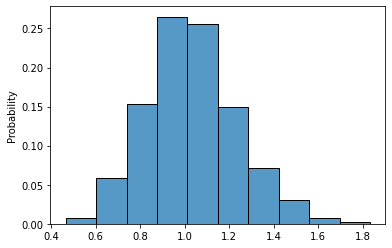

In [67]:
# Bootstrap estimation of the distribution density of the arithmetic mean
means = np.zeros(1000)
for i in range (0, 1000):
    rand = np.random.randint(0, n, n)
    xi = np.array([x[j] for j in rand])
    means[i] = np.mean(xi)
    
sns.histplot(means, bins = 10, stat = 'probability', common_norm = 1);

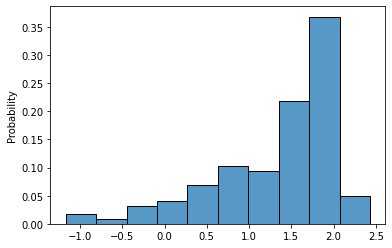

In [68]:
# Bootstrap estimation of the distribution density of the skewness coefficient
asymmetry = np.zeros(1000)
for i in range (0, 1000):
    rand = np.random.randint(0, n, n)
    xi = np.array([x[j] for j in rand])
    asymmetry[i] = st.mean((xi - mean) ** 3) / (st.mean((xi - mean) ** 2) ** 1.5)

sns.histplot(asymmetry, bins = 10, stat = 'probability', common_norm = 1);